In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import logging

FORMAT = '%(asctime)s %(message)s'

logging.basicConfig(level='INFO', format=FORMAT, datefmt='%d-%b-%y %H:%M:%S')
sns.set_context("talk")

In [3]:
from src.parameters import ANIMALS

ANIMALS

{'Jaq': Animal(directory='/data2/abhilasha/animals/Jaq/filterframework', short_name='Jaq'),
 'Roqui': Animal(directory='/data2/abhilasha/animals/Roqui/filterframework', short_name='Roqui')}

In [4]:
from loren_frank_data_processing import make_epochs_dataframe

epoch_info = make_epochs_dataframe(ANIMALS)

epoch_info.xs(("Jaq", 1))

,environment,type,exposure
epoch,,,
1,sleep,sleep,NaN
2,lineartrack,run,1.0
3,sleep,sleep,NaN
4,lineartrack,run,2.0
5,sleep,sleep,NaN
6,lineartrack,run,3.0
7,sleep,sleep,NaN


In [6]:
from src.load_data import load_data

epoch_key = ('Jaq', 1, 4) # animal, day, epoch

data = load_data(epoch_key)

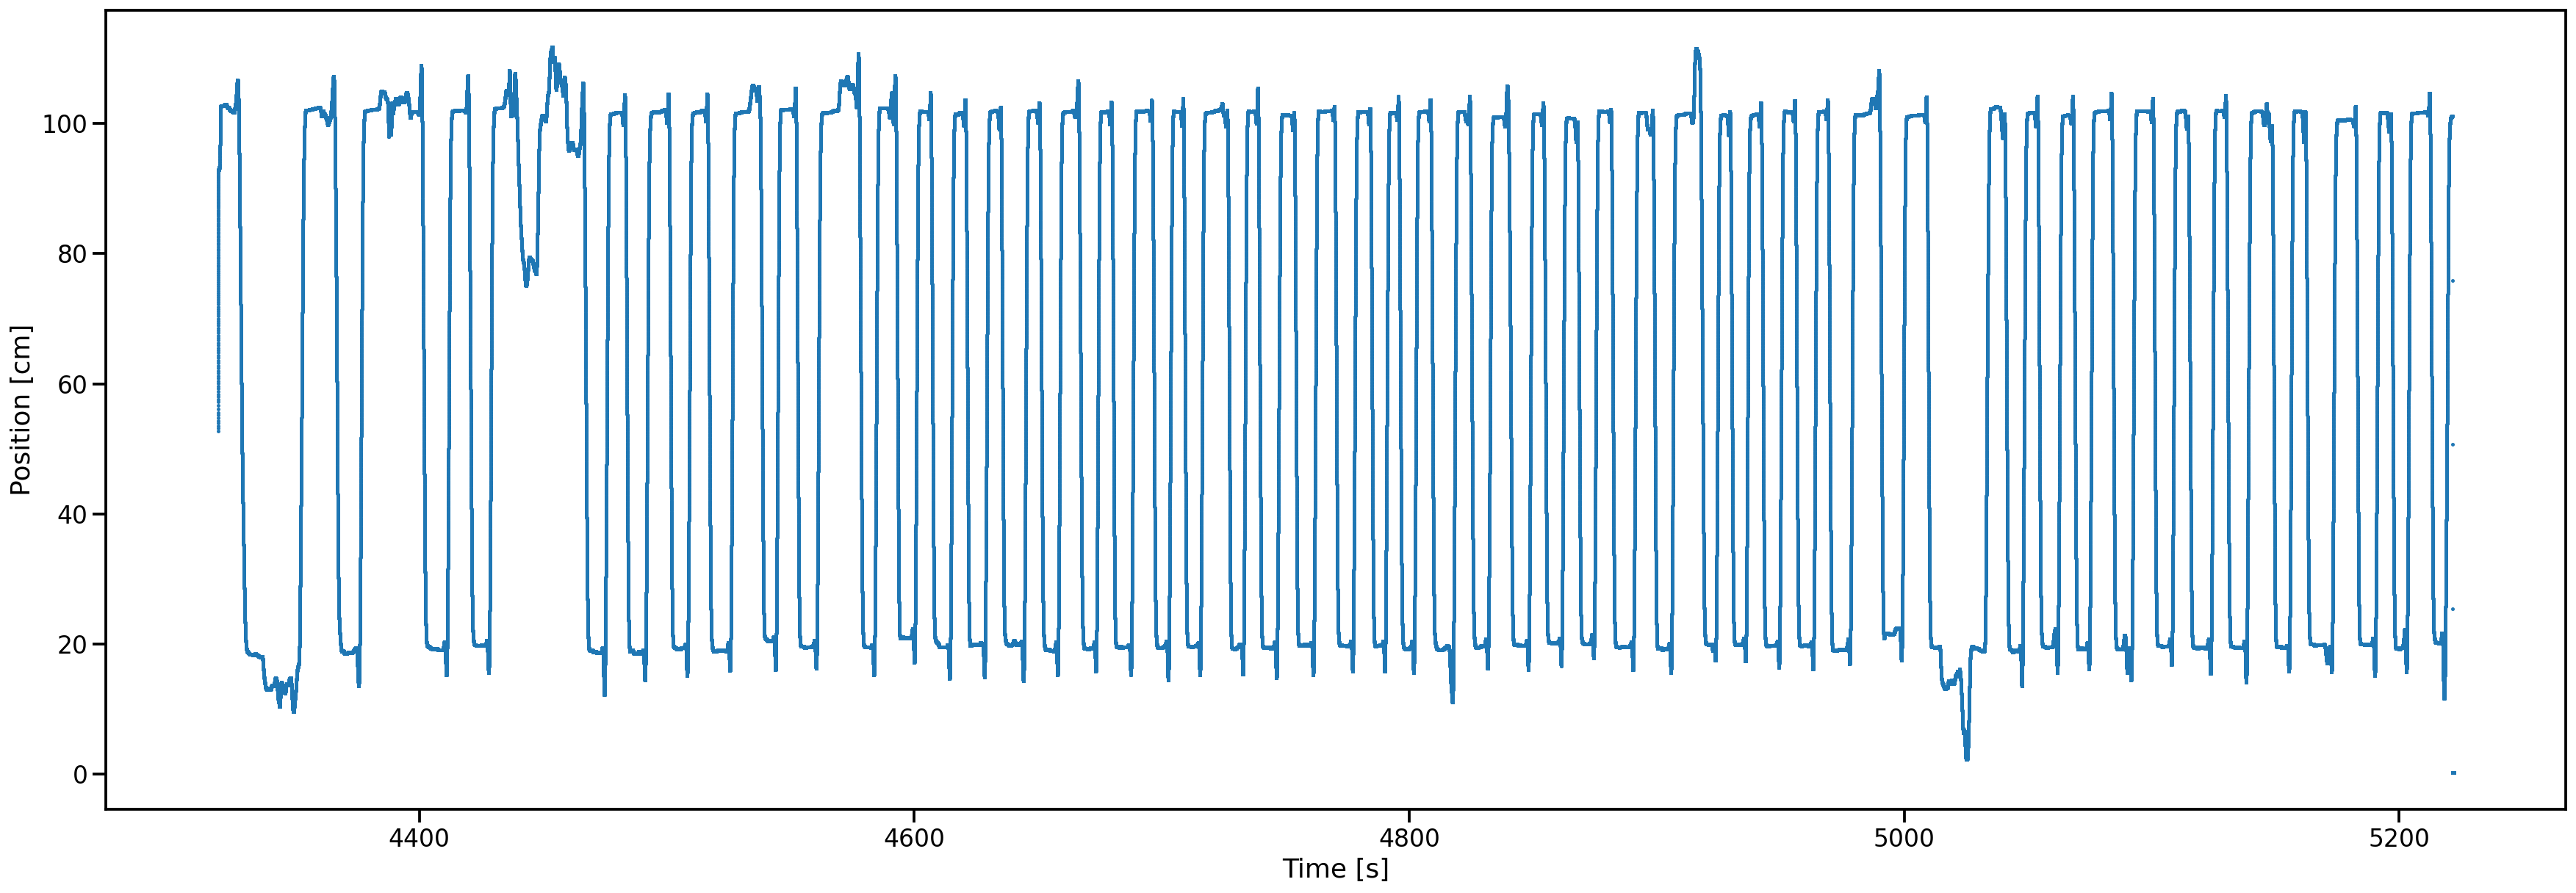

In [7]:
fig, ax = plt.subplots(figsize=(30, 10))

for edge_label, df in data['position_info'].groupby('track_segment_id'):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_position, s=1)
    
ax.set_ylabel('Position [cm]')
ax.set_xlabel('Time [s]');

In [8]:
from src.load_data import make_track_graph
from src.parameters import ANIMALS

track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)

0

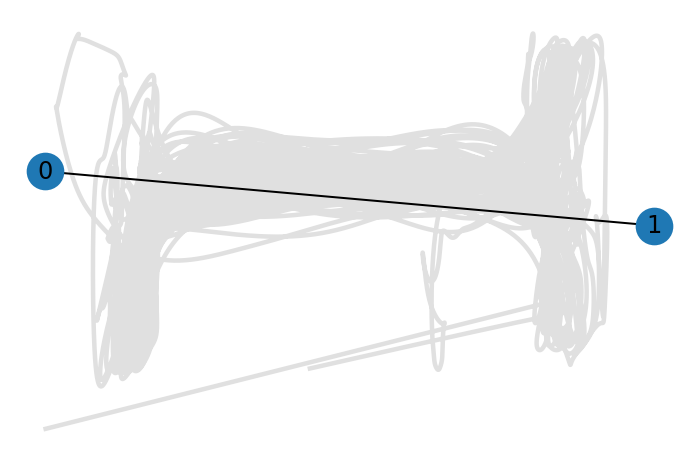

In [9]:
from loren_frank_data_processing.track_segment_classification import plot_track

plt.plot(data['position_info'].tail_x, data['position_info'].tail_y, color="lightgrey", alpha=0.7, zorder=-1)
plot_track(track_graph)
sns.despine(left=True, bottom=True)

center_well_id

In [10]:
is_spike = np.any(~np.isnan(data["multiunits"]), axis=1)

In [11]:
data["tetrode_info"]

area     deadchans depth  numcells  \
animal day epoch tetrode_number                                          
Jaq    1   4     1                  ca1L            []    []         0   
                 2                  ca1L            []    []         0   
                 3                  ca1L            []    []         0   
                 4                  ca1L            []    []         0   
                 5                  ca1L            []    []         0   
                 6                  ca1L            []    []         0   
                 7                  ca1L            []    []         0   
                 8                  ca1L            []    []         0   
                 9                  ca1L            []    []         0   
                 10                 ca1L            []    []         0   
                 11                 ca1L            []    []         0   
                 12                 ca1L            []    []         0   
                 13              ca1Lref            []    []         0   
                 14                 ca1L            []    []         0   
                 15                 ca1L            []    []         0   
                 16                 ca1R            []    []         0   
                 17                 ca1R            []    []         0   
                 18                 ca1R             4    []         0   
                 19              ca1Rref            []    []         0   
                 20                 ca1R            []    []         0   
                 21                 ca1R            []    []         0   
                 22                 ca1R            []    []         0   
                 23                 ca1R            []    []         0   
                 24                 ca1R            []    []         0   
                 25                 ca1R            []    []         0   
                 26                 ca1R  [1, 2, 3, 4]    []         0   
                 27                 ca1R            []    []         0   
                 28                 ca1R            []    []         0   
                 29                 ca1R            []    []         0   
                 30                 ca1R            []    []         0   
                 31                  NaN  [1, 2, 3, 4]    []         0   
                 32                  NaN  [1, 2, 3, 4]    []         0   

                                suparea  tetrode     tetrode_id  
animal day epoch tetrode_number                                  
Jaq    1   4     1                  hpc        1  Jaq_01_04_001  
                 2                  hpc        2  Jaq_01_04_002  
                 3                  hpc        3  Jaq_01_04_003  
                 4                  hpc        4  Jaq_01_04_004  
                 5                  hpc        5  Jaq_01_04_005  
                 6                  hpc        6  Jaq_01_04_006  
                 7                  hpc        7  Jaq_01_04_007  
                 8                  hpc        8  Jaq_01_04_008  
                 9                  hpc        9  Jaq_01_04_009  
                 10                 hpc       10  Jaq_01_04_010  
                 11                 hpc       11  Jaq_01_04_011  
                 12                 hpc       12  Jaq_01_04_012  
                 13                  cc       13  Jaq_01_04_013  
                 14                 hpc       14  Jaq_01_04_014  
                 15                 hpc       15  Jaq_01_04_015  
                 16                 hpc       16  Jaq_01_04_016  
                 17                 hpc       17  Jaq_01_04_017  
                 18                 hpc       18  Jaq_01_04_018  
                 19                  cc       19  Jaq_01_04_019  
                 20                 hpc       20  Jaq_01_04_020  
                 21                 hpc       21  Jaq_01_04_021  
 

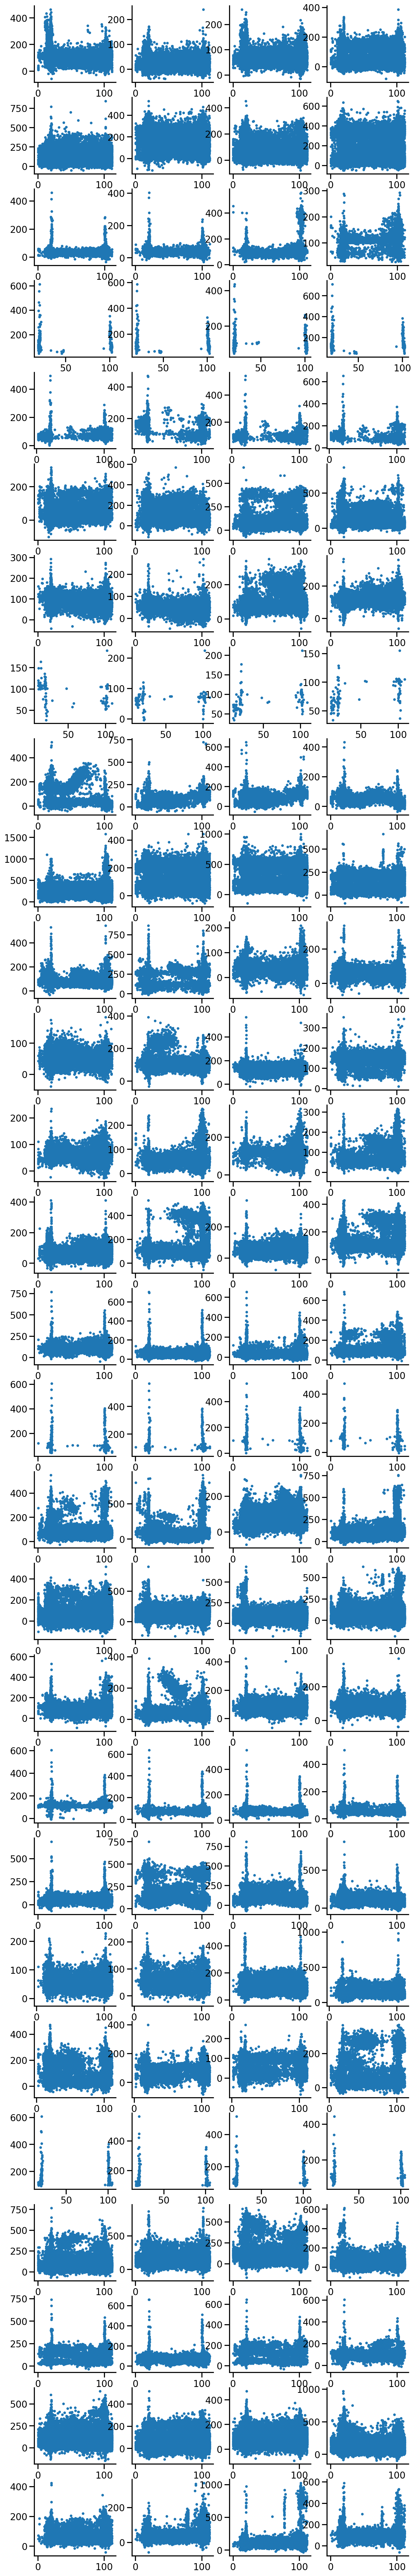

In [24]:
n_tetrodes = data["multiunits"].shape[-1]
linear_position = data["position_info"].linear_position.values

fig, axes = plt.subplots(nrows=n_tetrodes, ncols=4, figsize=(12, 3 * n_tetrodes), sharex=False, sharey=False, constrained_layout=False)

for tetrode_ind, multiunit in enumerate(data["multiunits"].transpose('tetrodes', 'features', 'time').values):
    for feature_ind, features in enumerate(multiunit):
        axes[tetrode_ind, feature_ind].scatter(linear_position[is_spike.isel(tetrodes=tetrode_ind)], features[is_spike.isel(tetrodes=tetrode_ind)], s=10)
sns.despine()


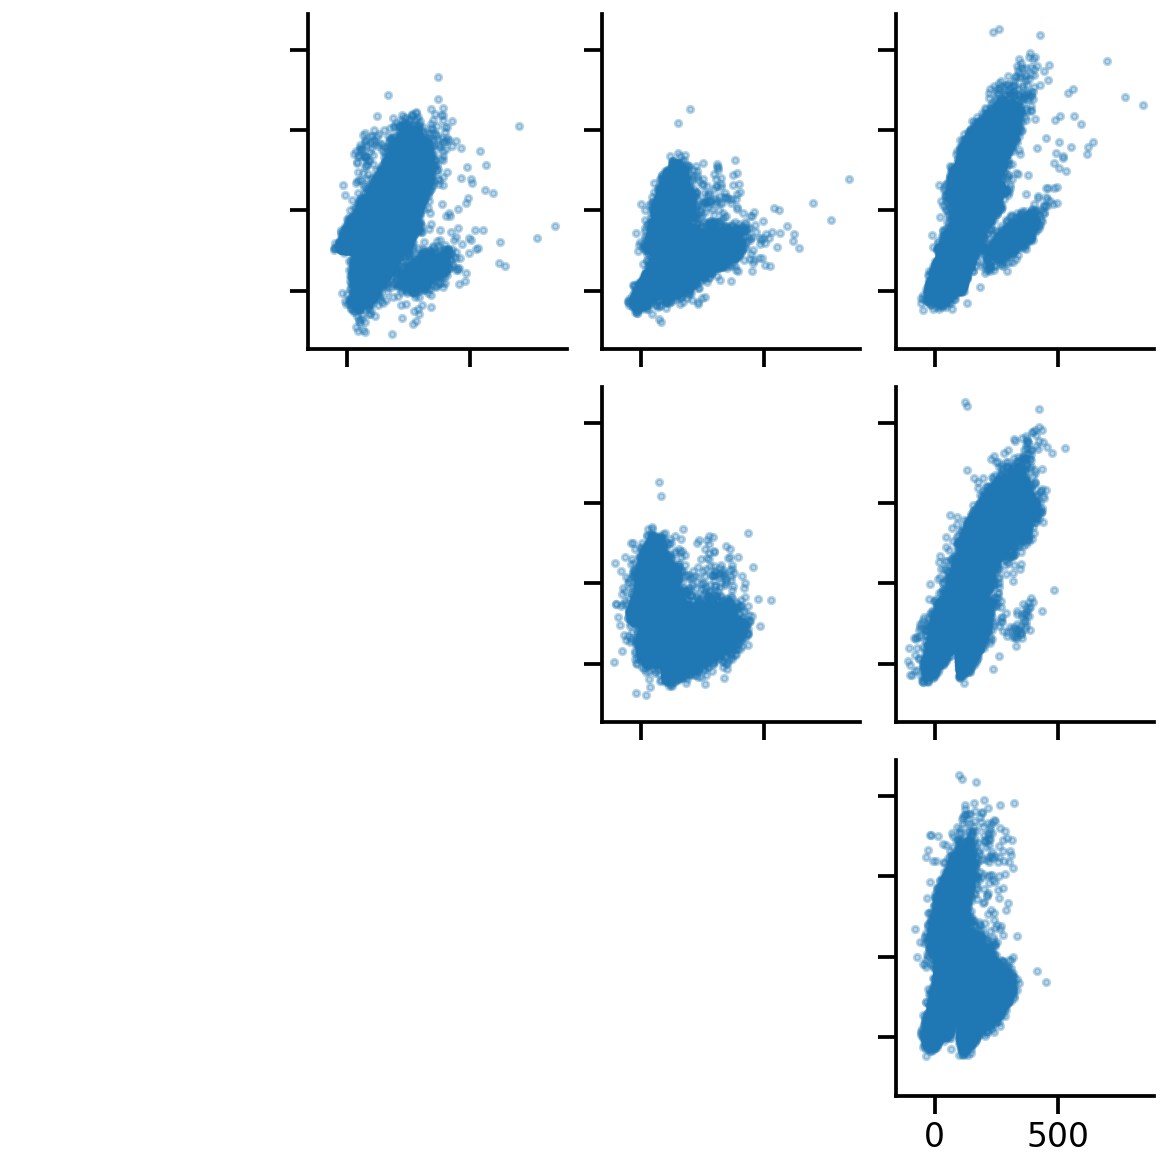

In [25]:
import itertools
fig, axes = plt.subplots(3, 4, figsize=(4 * 2, 4 * 2), sharex=True, sharey=True, constrained_layout=True)

for feature1, feature2 in itertools.combinations(range(4), 2):
    axes[feature1, feature2].scatter(data["multiunits"].isel(tetrodes=1, features=feature1).dropna("time"),
                                     data["multiunits"].isel(tetrodes=1, features=feature2).dropna("time"), s=10, alpha=0.3)
sns.despine()

for ax in axes[np.tril_indices_from(axes)]:
    ax.axis("off")

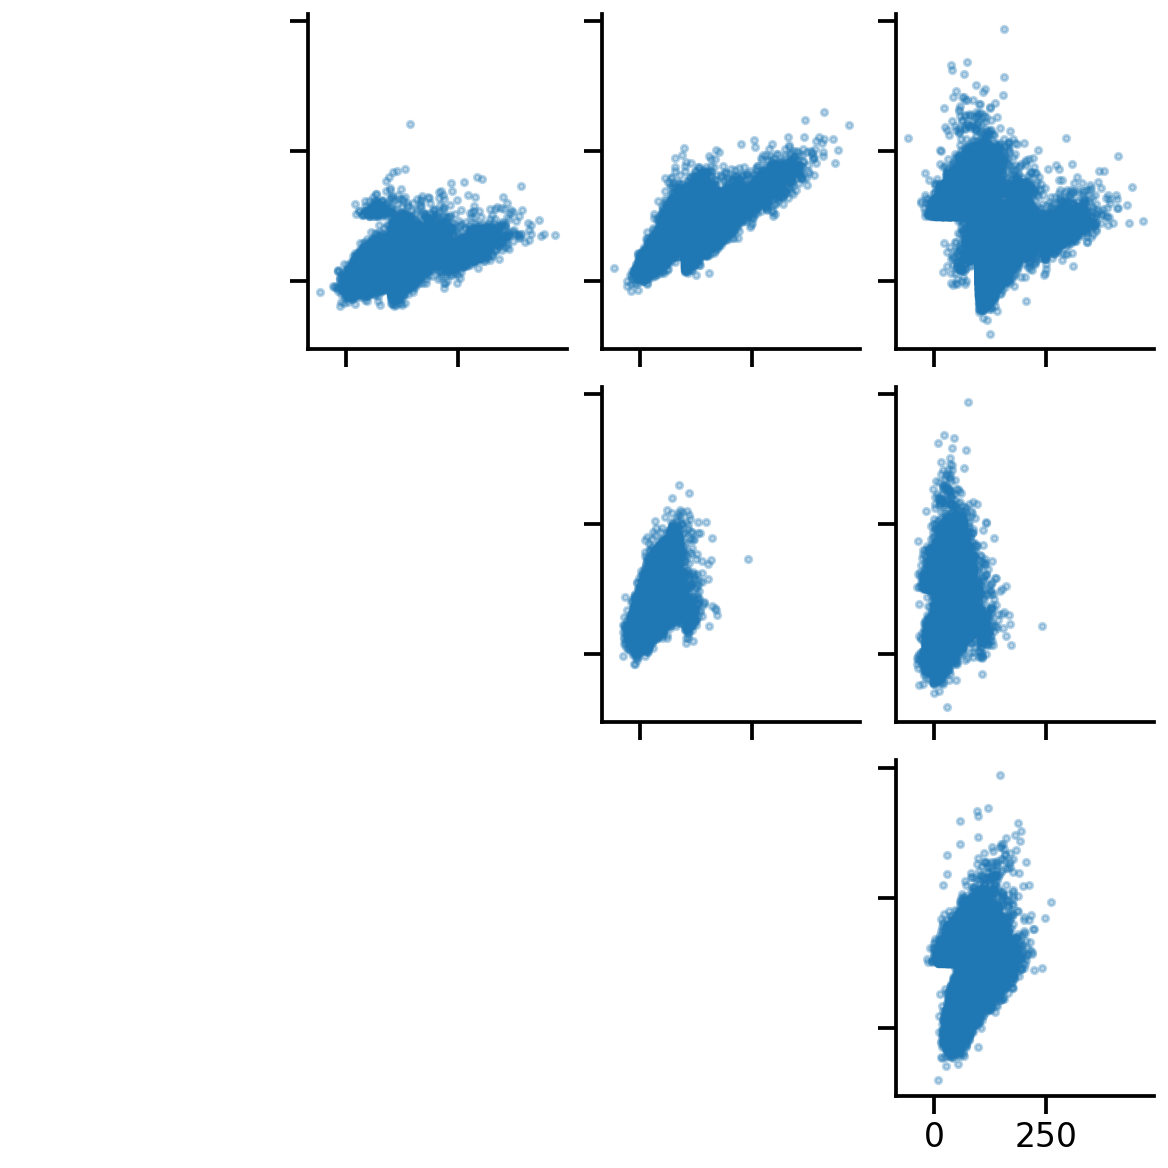

In [26]:
import itertools
fig, axes = plt.subplots(3, 4, figsize=(4 * 2, 4 * 2), sharex=True, sharey=True, constrained_layout=True)

tetrode_ind = 0

for feature1, feature2 in itertools.combinations(range(4), 2):
    axes[feature1, feature2].scatter(data["multiunits"].isel(tetrodes=tetrode_ind, features=feature1).dropna("time"),
                                     data["multiunits"].isel(tetrodes=tetrode_ind, features=feature2).dropna("time"), s=10, alpha=0.3)
sns.despine()

for ax in axes[np.tril_indices_from(axes)]:
    ax.axis("off")

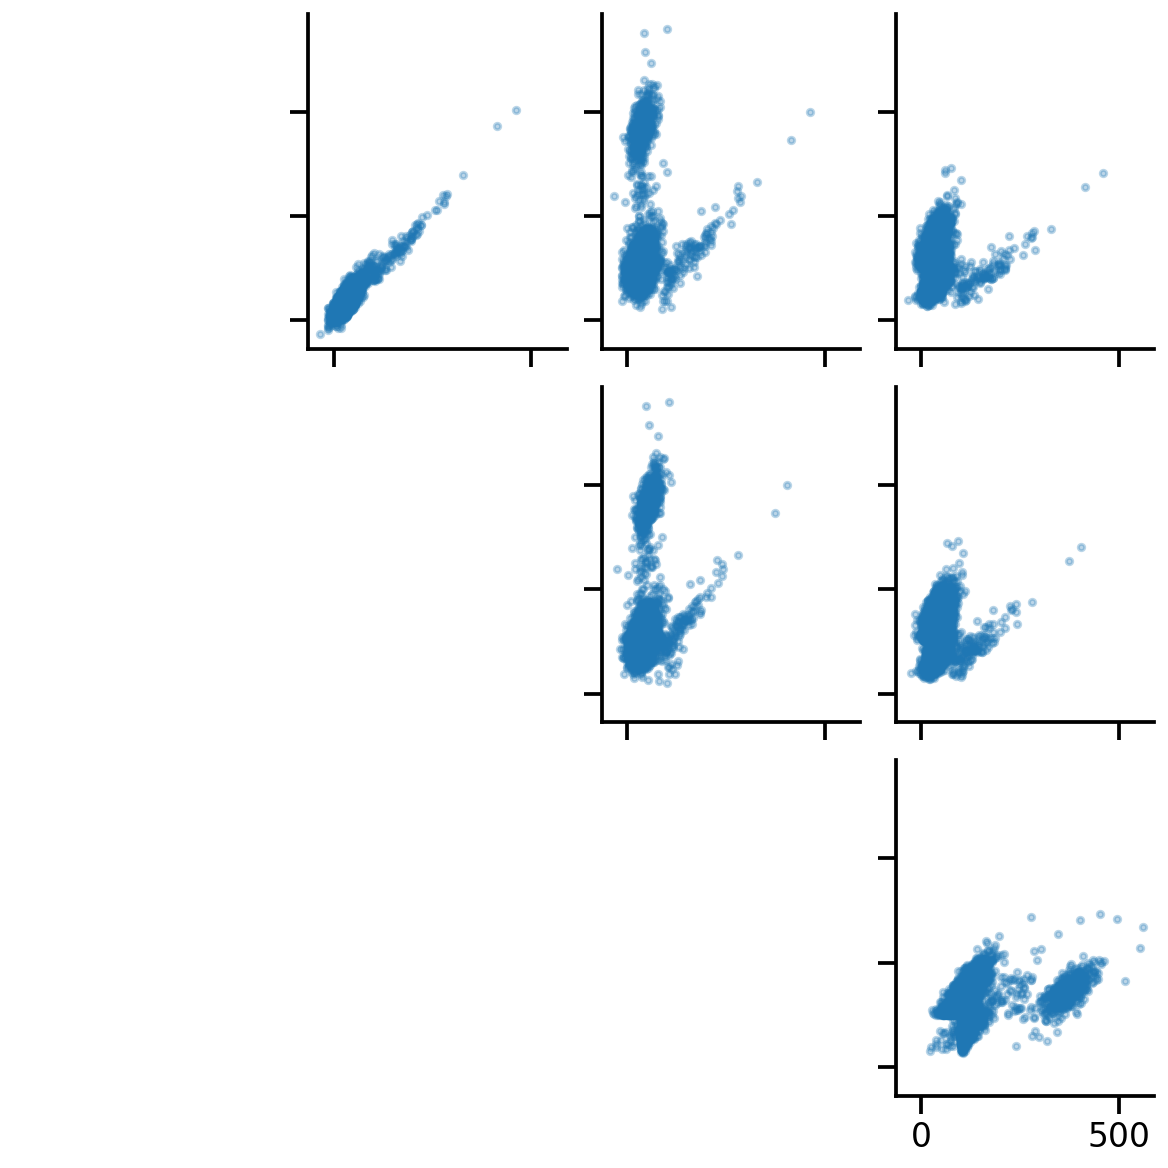

In [27]:
import itertools
fig, axes = plt.subplots(3, 4, figsize=(4 * 2, 4 * 2), sharex=True, sharey=True, constrained_layout=True)

tetrode_ind = 2

for feature1, feature2 in itertools.combinations(range(4), 2):
    axes[feature1, feature2].scatter(data["multiunits"].isel(tetrodes=tetrode_ind, features=feature1).dropna("time"),
                                     data["multiunits"].isel(tetrodes=tetrode_ind, features=feature2).dropna("time"), s=10, alpha=0.3)
sns.despine()

for ax in axes[np.tril_indices_from(axes)]:
    ax.axis("off")

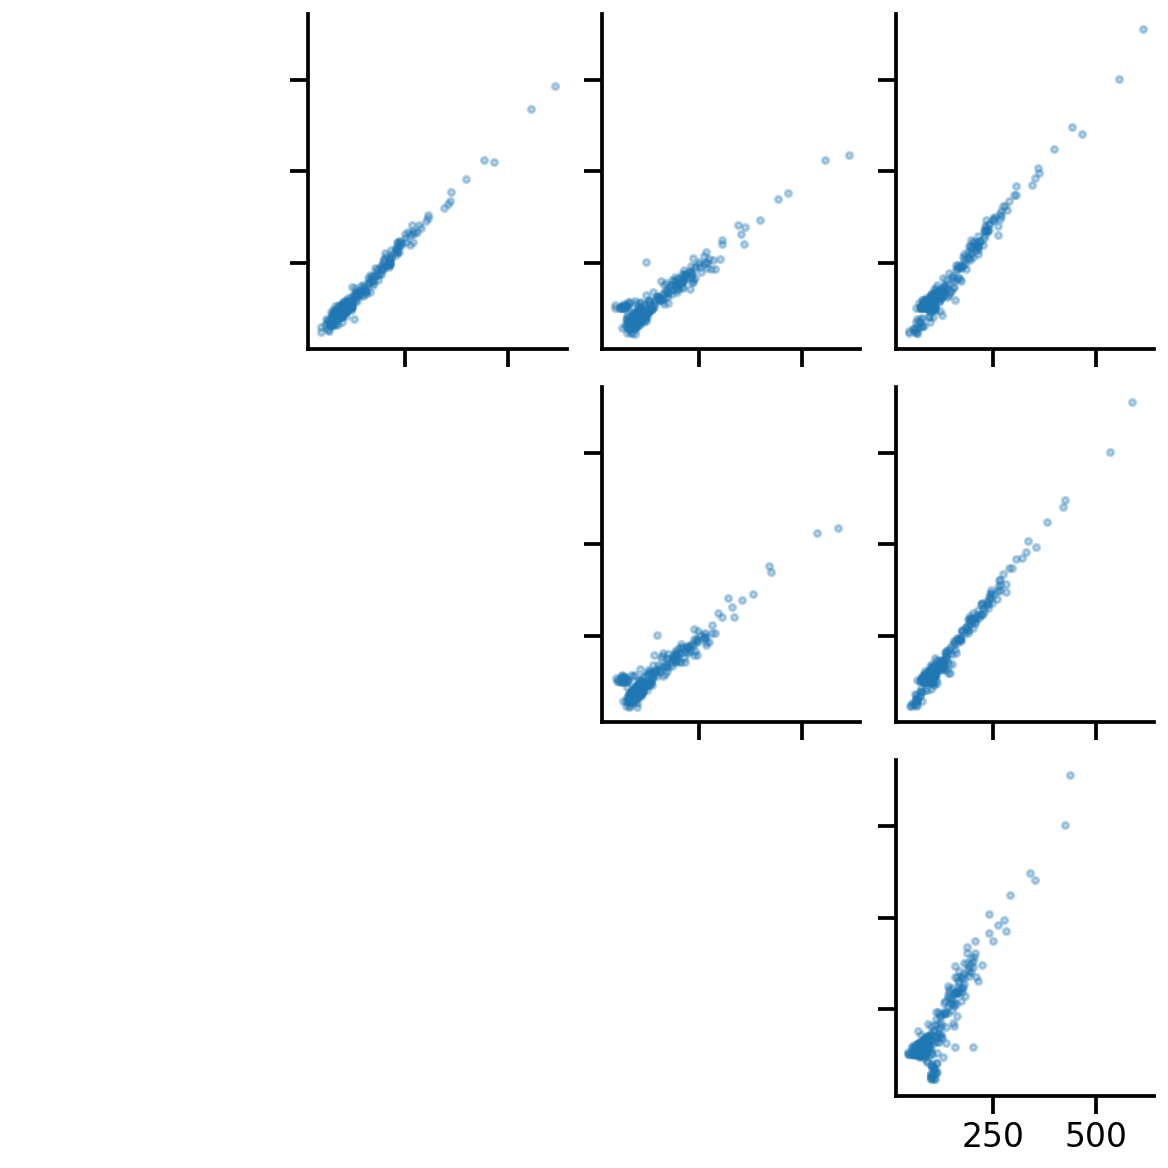

In [28]:
import itertools
fig, axes = plt.subplots(3, 4, figsize=(4 * 2, 4 * 2), sharex=True, sharey=True, constrained_layout=True)

tetrode_ind = 3

for feature1, feature2 in itertools.combinations(range(4), 2):
    axes[feature1, feature2].scatter(data["multiunits"].isel(tetrodes=tetrode_ind, features=feature1).dropna("time"),
                                     data["multiunits"].isel(tetrodes=tetrode_ind, features=feature2).dropna("time"), s=10, alpha=0.3)
sns.despine()

for ax in axes[np.tril_indices_from(axes)]:
    ax.axis("off")

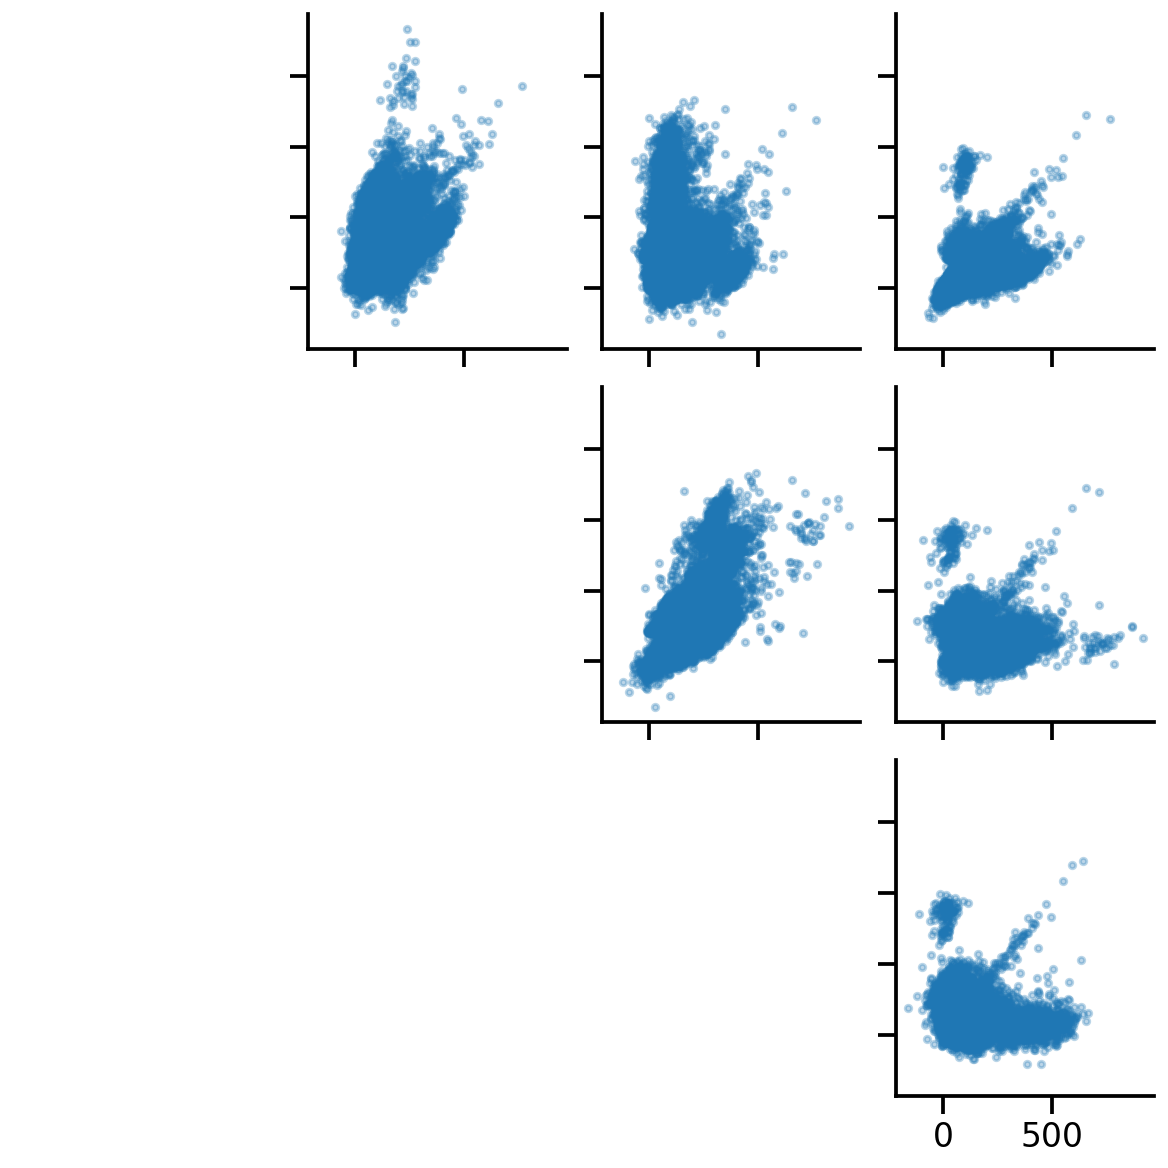

In [29]:
import itertools
fig, axes = plt.subplots(3, 4, figsize=(4 * 2, 4 * 2), sharex=True, sharey=True, constrained_layout=True)

tetrode_ind = 24

for feature1, feature2 in itertools.combinations(range(4), 2):
    axes[feature1, feature2].scatter(data["multiunits"].isel(tetrodes=tetrode_ind, features=feature1).dropna("time"),
                                     data["multiunits"].isel(tetrodes=tetrode_ind, features=feature2).dropna("time"), s=10, alpha=0.3)
sns.despine()

for ax in axes[np.tril_indices_from(axes)]:
    ax.axis("off")

In [12]:
is_running = np.abs(data["position_info"].tail_vel) > 4

In [13]:
EDGE_ORDER = [0]
EDGE_SPACING = 0

In [14]:
from replay_trajectory_classification import ClusterlessClassifier
from src.parameters import classifier_parameters, discrete_state_transition

from sklearn.model_selection import KFold
from tqdm.auto import tqdm

cv = KFold()
cv_classifier_clusterless_results = []

for fold_ind, (train, test) in enumerate(cv.split(data["position_info"].index)):
    logging.info(f"Fold #{fold_ind}")
    cv_classifier = ClusterlessClassifier(**classifier_parameters)

    cv_classifier.fit(
        position=data["position_info"].iloc[train].linear_position,
        multiunits=data["multiunits"].isel(time=train),
        is_training=is_running.iloc[train],
    )
    cv_classifier.discrete_state_transition_ = discrete_state_transition
    logging.info('Predicting posterior...')
    cv_classifier_clusterless_results.append(
        cv_classifier.predict(
            data["multiunits"].isel(time=test),
            time=data["position_info"].iloc[test].index / np.timedelta64(1, "s"),
        )
    )
logging.info("Done...")

16-Mar-20 14:49:41 Fold #0
16-Mar-20 14:49:41 Fitting initial conditions...
16-Mar-20 14:49:42 Fitting state transition...
16-Mar-20 14:49:42 Fitting multiunits...
16-Mar-20 14:49:43 Predicting posterior...
16-Mar-20 14:59:02 Fold #1
16-Mar-20 14:59:02 Fitting initial conditions...
16-Mar-20 14:59:02 Fitting state transition...
16-Mar-20 14:59:02 Fitting multiunits...
16-Mar-20 14:59:03 Predicting posterior...
16-Mar-20 15:07:45 Fold #2
16-Mar-20 15:07:46 Fitting initial conditions...
16-Mar-20 15:07:46 Fitting state transition...
16-Mar-20 15:07:46 Fitting multiunits...
16-Mar-20 15:07:46 Predicting posterior...
16-Mar-20 15:16:23 Fold #3
16-Mar-20 15:16:23 Fitting initial conditions...
16-Mar-20 15:16:23 Fitting state transition...
16-Mar-20 15:16:23 Fitting multiunits...
16-Mar-20 15:16:23 Predicting posterior...
16-Mar-20 15:24:43 Fold #4
16-Mar-20 15:24:43 Fitting initial conditions...
16-Mar-20 15:24:43 Fitting state transition...
16-Mar-20 15:24:43 Fitting multiunits...
16-Mar-2

In [15]:
cv_classifier_clusterless_results[-1]

<xarray.Dataset>
Dimensions:            (position: 44, state: 2, time: 90363)
Coordinates:
  * time               (time) float64 5.042e+03 5.042e+03 ... 5.222e+03
  * position           (position) float64 3.468 5.959 8.449 ... 108.1 110.5
  * state              (state) <U11 'random_walk' 'uniform'
Data variables:
    likelihood         (time, state, position) float64 0.9613 0.9842 ... 1.0
    causal_posterior   (time, state, position) float64 0.01602 ... 0.003775
    acausal_posterior  (time, state, position) float64 0.002774 ... 0.003775

In [16]:
cv_classifier_clusterless_results[-2]

<xarray.Dataset>
Dimensions:            (position: 45, state: 2, time: 90363)
Coordinates:
  * time               (time) float64 4.861e+03 4.861e+03 ... 5.042e+03
  * position           (position) float64 1.45 3.93 6.409 ... 105.6 108.1 110.6
  * state              (state) <U11 'random_walk' 'uniform'
Data variables:
    likelihood         (time, state, position) float64 0.4415 nan ... 0.2206
    causal_posterior   (time, state, position) float64 0.01018 nan ... 0.001136
    acausal_posterior  (time, state, position) float64 0.2146 nan ... 0.001136

In [17]:
cv_classifier_clusterless_results[-3]

<xarray.Dataset>
Dimensions:            (position: 45, state: 2, time: 90363)
Coordinates:
  * time               (time) float64 4.68e+03 4.68e+03 ... 4.861e+03 4.861e+03
  * position           (position) float64 1.45 3.93 6.409 ... 105.6 108.1 110.6
  * state              (state) <U11 'random_walk' 'uniform'
Data variables:
    likelihood         (time, state, position) float64 0.9937 0.9774 ... 0.42
    causal_posterior   (time, state, position) float64 0.013 0.01279 ... 0.00169
    acausal_posterior  (time, state, position) float64 0.0002741 ... 0.00169

In [18]:
cv_classifier_clusterless_results[-4]

<xarray.Dataset>
Dimensions:            (position: 45, state: 2, time: 90363)
Coordinates:
  * time               (time) float64 4.499e+03 4.499e+03 ... 4.68e+03 4.68e+03
  * position           (position) float64 1.45 3.93 6.409 ... 105.6 108.1 110.6
  * state              (state) <U11 'random_walk' 'uniform'
Data variables:
    likelihood         (time, state, position) float64 0.9816 0.9737 ... 0.7498
    causal_posterior   (time, state, position) float64 0.01214 ... 0.009063
    acausal_posterior  (time, state, position) float64 0.0004572 ... 0.009063

The problem was a NaN in linear position. We were not dropping it in the `load_data` function and it wasn't being handled in the occupancy calculation in the clusterless classifier. It probably shouldn't have appeared in the first place because it was the NaN in the empirical state transition of the linearization on the first time step which doesn't affect any calculations.